In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import os
df=pd.read_csv(os.path.join("data", "lab-01", "top2018.csv"))


In [2]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [3]:
df=df.head(15)

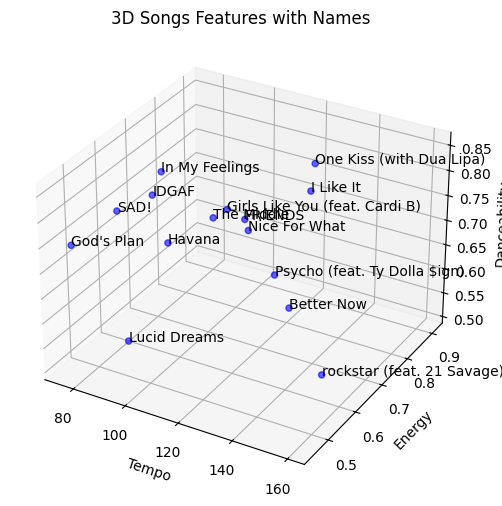

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["tempo"], df["energy"], df["danceability"], c='blue', alpha=0.6)

# Add song names as labels
for i, row in df.iterrows():
    ax.text(row["tempo"], row["energy"], row["danceability"], row["name"])

ax.set_xlabel("Tempo")
ax.set_ylabel("Energy")
ax.set_zlabel("Danceability")
plt.title("3D Songs Features with Names")
plt.show()


In [5]:

# E

# Select features only
features = df[["tempo", "energy", "danceability"]]

# Compute pairwise Euclidean distances
dist_matrix = squareform(pdist(features, metric="euclidean"))

# Put into a DataFrame for readability
distance_df = pd.DataFrame(dist_matrix, index=df["name"], columns=df["name"])


In [6]:
distance_df

name,God's Plan,SAD!,rockstar (feat. 21 Savage),Psycho (feat. Ty Dolla $ign),In My Feelings,Better Now,I Like It,One Kiss (with Dua Lipa),IDGAF,FRIENDS,Havana,Lucid Dreams,Nice For What,Girls Like You (feat. Cardi B),The Middle
name,,,,,,,,,,,,,,,
God's Plan,0.000000,2.152303,82.678213,62.955098,13.862367,67.859136,58.879684,46.826836,19.859397,17.915642,27.819101,6.739399,16.232389,47.790187,29.841725
SAD!,2.152303,0.000000,84.824174,65.101022,16.007287,70.005044,61.025152,48.971660,22.005318,20.058101,29.965146,8.883077,18.374030,49.936175,31.987033
rockstar (feat. 21 Savage),82.678213,84.824174,0.000000,19.723600,68.817507,14.819318,23.800868,35.855072,62.819494,64.768931,54.859290,75.944044,66.454052,34.888999,52.837402
Psycho (feat. Ty Dolla $ign),62.955098,65.101022,19.723600,0.000000,49.094140,4.904357,4.080146,16.132929,43.096112,45.046285,35.136028,56.221463,46.731561,15.165424,33.114148
In My Feelings,13.862367,16.007287,68.817507,49.094140,0.000000,53.998259,45.018115,32.964874,5.998561,4.062339,13.958556,7.134613,2.393864,33.929110,15.980240
Better Now,67.859136,70.005044,14.819318,4.904357,53.998259,0.000000,8.982509,21.036418,48.000257,49.950035,40.040110,61.125234,51.635245,20.069741,38.018186
I Like It,58.879684,61.025152,23.800868,4.080146,45.018115,8.982509,0.000000,12.054793,39.020430,40.969730,31.060705,52.146137,42.655013,11.090598,29.038150
One Kiss (with Dua Lipa),46.826836,48.971660,35.855072,16.132929,32.964874,21.036418,12.054793,0.000000,26.967913,28.915476,19.009041,40.093070,30.600723,1.018757,16.985280
IDGAF,19.859397,22.005318,62.819494,43.096112,5.998561,48.000257,39.020430,26.967913,0.000000,1.988868,7.960344,13.129042,3.660831,27.931004,9.982985


In [7]:

cos_sim = cosine_similarity(features)

# Put into DataFrame for readability
cosine_df = pd.DataFrame(cos_sim, index=df["name"], columns=df["name"])
cosine_df

name,God's Plan,SAD!,rockstar (feat. 21 Savage),Psycho (feat. Ty Dolla $ign),In My Feelings,Better Now,I Like It,One Kiss (with Dua Lipa),IDGAF,FRIENDS,Havana,Lucid Dreams,Nice For What,Girls Like You (feat. Cardi B),The Middle
name,,,,,,,,,,,,,,,
God's Plan,1.000000,0.999997,0.999978,0.999988,0.999999,0.999985,0.999993,0.999994,0.999999,0.999989,0.999997,0.999993,0.999986,0.999995,0.999996
SAD!,0.999997,1.000000,0.999969,0.999981,0.999999,0.999977,0.999989,0.999993,0.999996,0.999994,0.999992,0.999992,0.999992,0.999988,0.999994
rockstar (feat. 21 Savage),0.999978,0.999969,1.000000,0.999999,0.999979,0.999999,0.999995,0.999990,0.999985,0.999978,0.999992,0.999991,0.999976,0.999995,0.999990
Psycho (feat. Ty Dolla $ign),0.999988,0.999981,0.999999,1.000000,0.999988,1.000000,0.999999,0.999995,0.999993,0.999985,0.999997,0.999996,0.999983,0.999999,0.999996
In My Feelings,0.999999,0.999999,0.999979,0.999988,1.000000,0.999985,0.999994,0.999996,0.999999,0.999994,0.999996,0.999995,0.999992,0.999994,0.999997
Better Now,0.999985,0.999977,0.999999,1.000000,0.999985,1.000000,0.999998,0.999994,0.999991,0.999984,0.999996,0.999995,0.999982,0.999998,0.999995
I Like It,0.999993,0.999989,0.999995,0.999999,0.999994,0.999998,1.000000,0.999999,0.999997,0.999992,0.999999,0.999999,0.999990,0.999999,0.999999
One Kiss (with Dua Lipa),0.999994,0.999993,0.999990,0.999995,0.999996,0.999994,0.999999,1.000000,0.999997,0.999997,0.999998,1.000000,0.999996,0.999996,0.999999
IDGAF,0.999999,0.999996,0.999985,0.999993,0.999999,0.999991,0.999997,0.999997,1.000000,0.999991,0.999999,0.999996,0.999989,0.999998,0.999999
